##### Edward's Personal Notebook  
dataset is the "Police Incident Blotter From 2015 - 2022". Or in other words, the amount of police incidents in Pittsburgh from 2015-2022 

In [3]:
# importing required libraries and settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas
pd.set_option('display.max_colwidth', None)

In [4]:
# Reading in data
df = pd.read_csv("crimeall.csv", sep = ',')
df.head(5)            # print dataframe sample


,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,2802309,16000001.0,10,2016-01-01T00:00:00,"400 Block North Shore DR Pittsburgh, PA 15212",Y,North Shore,1,HARRASSMENT/THREAT/ATTEMPT/PHY,2702 Aggravated Assault. / 2709(a) Harassment. / 3503.B1I DEF. TRESPASS ACTUAL COMMUNICATION,2205.0,1.0,6.0,-80.012337,40.446263
1,2803174,16004547.0,11,2016-01-01T00:01:00,"5400 Block Carnegie ST Pittsburgh, PA 15201",N,Upper Lawrenceville,2,THEFT BY DECEPTION,3922 Theft by Deception.,1011.0,7.0,2.0,-79.950295,40.482290
2,2801809,16000367.0,4,2016-01-01T00:10:00,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,DISCHARGE OF FIREARM INTO OCC.STRUCTURE,2707.1 Discharge of a Firearm into Occupied Structure,2609.0,1.0,1.0,-80.000966,40.478651
3,2802315,16000035.0,10,2016-01-01T00:15:00,"300 Block Wood ST Pittsburgh, PA 15222",Y,Golden Triangle/Civic Arena,2,HARRASSMENT/THREAT/ATTEMPT/PHY,2709(a)(3) Harassment No Legitimate Purpose,201.0,6.0,6.0,-80.001251,40.438918
4,2802312,16000024.0,4,2016-01-01T00:16:00,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,PROP MISSILE INTO OCC VEHICLE/OR ROADWAY,2705 Recklessy Endangering Another Person. / 3304 Criminal Mischief. / 2707.1 Discharge of a Firearm into Occupied Structure,2609.0,1.0,1.0,-80.000966,40.478651


In [6]:
# lower number of police incidents correlates to safety, so I removed uneeded columns
df_sub = df.INCIDENTNEIGHBORHOOD.value_counts()     # stores count of each unique value
df_reverse = df_sub.iloc[::-1]                      # reversing data frame to show from lowest value....a better way might exist
df_reverse.head(15)

Mt. Oliver Boro             87
Mt. Oliver Neighborhood    117
Outside County             189
Troy Hill-Herrs Island     252
Ridgemont                  264
Outside State              264
Chartiers City             271
New Homestead              290
East Carnegie              364
Swisshelm Park             372
Mount Oliver               432
Summer Hill                440
Arlington Heights          443
Regent Square              461
Hays                       473
Name: INCIDENTNEIGHBORHOOD, dtype: int64

In [8]:
# Mount Oliver appears 3 different times so there is something wrong with the dataset.
# Below removed series are sourced from the Official Designations from the City of Pittsburgh
df = df[df['INCIDENTNEIGHBORHOOD'] != 'Outside County']                 # This is not a Pittsburgh Neighborhood
df = df[df['INCIDENTNEIGHBORHOOD'] != 'Outside State']                  # This is not a Pittsburgh Neighborhood
df = df[df['INCIDENTNEIGHBORHOOD'] != 'Mt. Oliver Boro']                # This is not a Pittsburgh Neighborhood  ***Mt. Oliver is a 
                                                                        # Pittsburgh neighborhood, but Mt. Oliver Boro is not.***

# I merged Mount Oliver and Mt. Oliver Neighborhood, I checked the street addresses of them and they are in the same neighborhood. This error
# in the dataset might be due to Mt. Oliver Boro being included but not being a neighborhood a part of Pittsburgh. So perhaps some officers added 
# the "neighborhood" at the end to help clarify.
df = df.replace(to_replace = 'Mt. Oliver Neighborhood', value ='Mount Oliver')
# df                                             # testing purposes

In [9]:
# Data comprises police reports in the Pittsburgh Area from 2015 to the present
# Only Pitt police, no campus police or port authority
# keep final 5 years

df_sub = df.INCIDENTNEIGHBORHOOD.value_counts()     # stores count of each unique value
df_reverse = df_sub.iloc[::-1]                      # reversing data frame to show from lowest value....a better way might exist
df_reverse                                          # showing the series after filtering through unneeded columns and rows

Troy Hill-Herrs Island         252
Ridgemont                      264
Chartiers City                 271
New Homestead                  290
East Carnegie                  364
                             ...  
Shadyside                     7136
Bloomfield                    7411
Carrick                       9766
Central Business District    14604
South Side Flats             15904
Name: INCIDENTNEIGHBORHOOD, Length: 94, dtype: int64

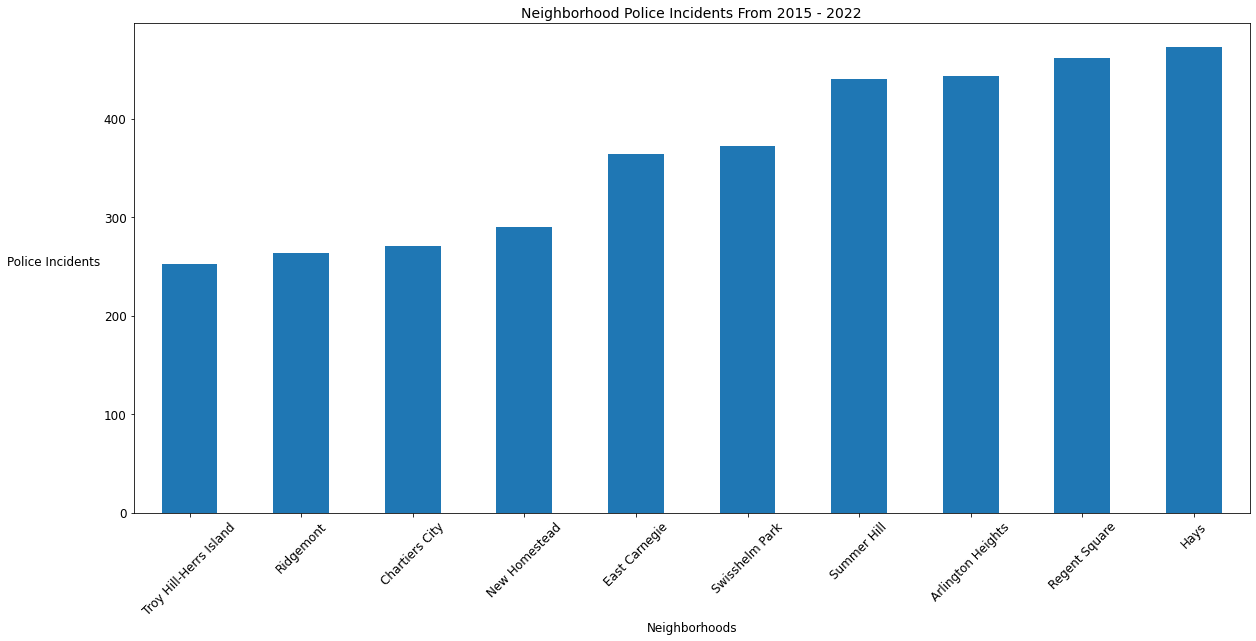

In [10]:
plt.rcParams["figure.figsize"] = [20,9]     # setting graph size or else it's too small
df_reverse10 = df_reverse.iloc[:10]         # show only first 10 neighborhoods
df_reverse10.plot.bar()                     # graphing our dataframe
plt.title("Neighborhood Police Incidents From 2015 - 2022", fontsize = 14)   # graph title
plt.xticks(fontsize = 12,rotation=45)       # rorate x-axis for readability
plt.xlabel("Neighborhoods", fontsize = 12)  # set x-axis label

plt.yticks(fontsize = 12)                   # rotate x-axis for readability
plt.ylabel("Police Incidents", fontsize = 12, rotation = 0, labelpad = 50)  # y-axis label, padding because it enters the graph body
plt.show()                                  # show graph more cleanly

# herrs island is part of troy hill neighborhood

##### Conclusion - Edward
This data set had over 277000 rows of data, each representing 1 police incident in a Pittsburgh neighborhood over the span of 7 years. I organized the data so that each neighborhood had a score(the number of police incidents). The lower the score, the safer the neighborhood is. In result, the Troy Hill-Herrs Island Neighborhood had the least amount of incidents, and therefore was the "best" neighborhood for my submetric. 

Something I'd like to mention is: the data set didn't have population density data. I think with a larger population, it is only natural for police incidents to go up. So I think this factor would also affect the information gained from this data set and even potentially become a shortcoming for this interpretation.

The data driven determination of the "best" neighbohood is different from my personal favorite. East Liberty is my personal favorite, simply because I live there.........although......definitely wouldn't recommend living here. Kinda dangerous at night. O.O

<function matplotlib.pyplot.show(close=None, block=None)>

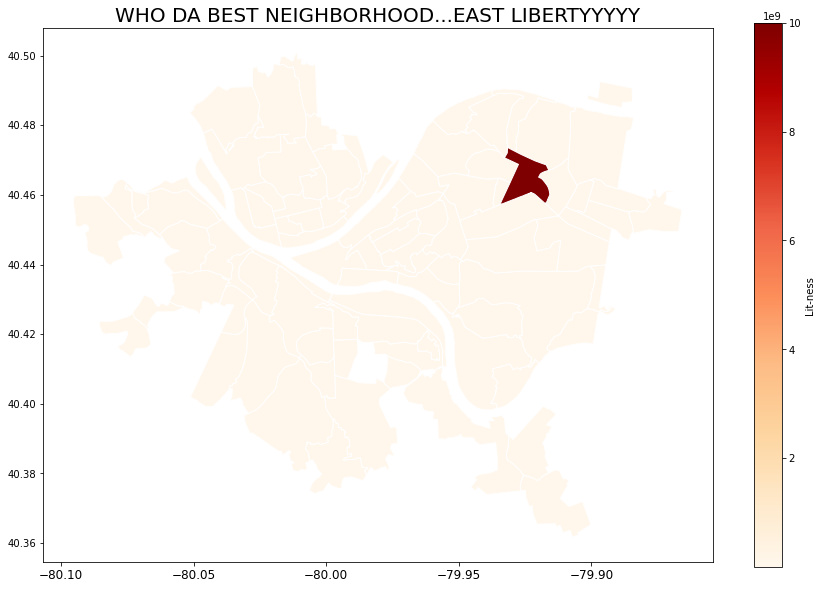

In [11]:
# Merge map with csv
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read shp
df_sub['East Liberty'] = 9999999999

df_merge = df_sub.rename_axis('INCIDENTNEIGHBORHOOD').to_frame('count')
steps_map = neighborhoods.merge(df_merge, how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')
steps_map.plot(column='count', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Lit-ness" }, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "white"} # set disctricts with no data to gray
               )
plt.title("WHO DA BEST NEIGHBORHOOD...EAST LIBERTYYYYY", fontsize = 20)   # graph title
plt.xticks(fontsize = 12,rotation=0)       # rorate x-axis for readability
plt.show

Wentao's Personal Notebook

_____________________________________________________________________________________________________________________________________________________________________________________________________

In [13]:
#read the data
df1 = pd.read_csv("ISP.csv")
#delete the invalid data
df2 = df1[df1.MaxCIRDown >= 16]
df3 = df1[df1.MaxCIRUp >= 16]
#sort
value_count = df3['Neighborhood'].value_counts()
df4 = value_count.rename_axis('Neighborhood').to_frame('count')
df4.head(20)

,count
Neighborhood,
Central Business District,410
South Side Flats,200
Strip District,149
North Shore,120
Shadyside,106
Bloomfield,101
Bluff,92
North Oakland,90
Lower Lawrenceville,81


Text(0.5, 1.0, 'Best Internet Service - Downtown')

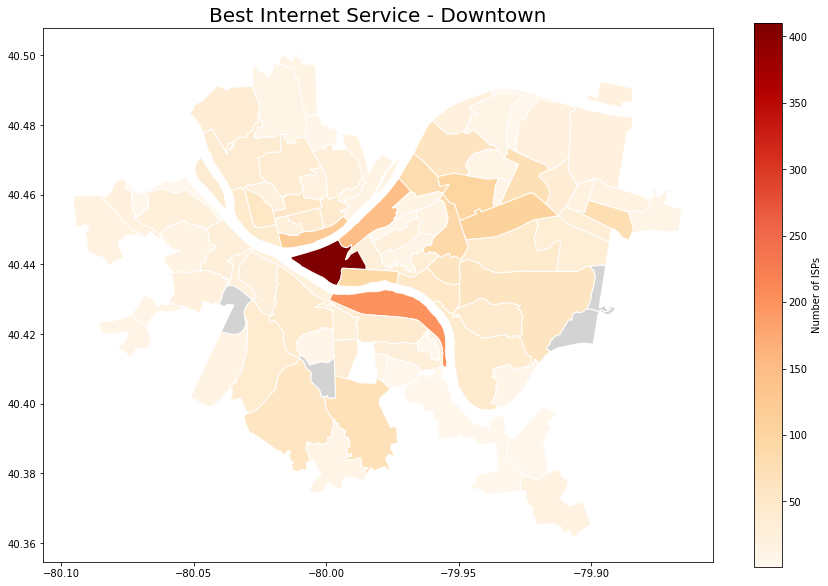

In [22]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
# do the merge
ISP_map = neighborhoods.merge(df4, how='left', left_on='hood', right_on='Neighborhood')
ISP_map.plot(column='count', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of ISPs"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )
plt.title("Best Internet Service - Downtown", fontsize = 20)   # graph title

##### Wentao's Conclusion

According to my analysis, Central Business District is the best Neighbourhood - Downtown. My data analysis also has some shortcomings. We consider the living experience of the residents, but my results show that the most convenient area for the Internet is dowtown, which has a large number of companies. It's not a residential area. In addition, the effect will be better if the population and area of each neighborhood are analyzed.

_____________________________________________________________________________________________________________________________________________________________________________________________________

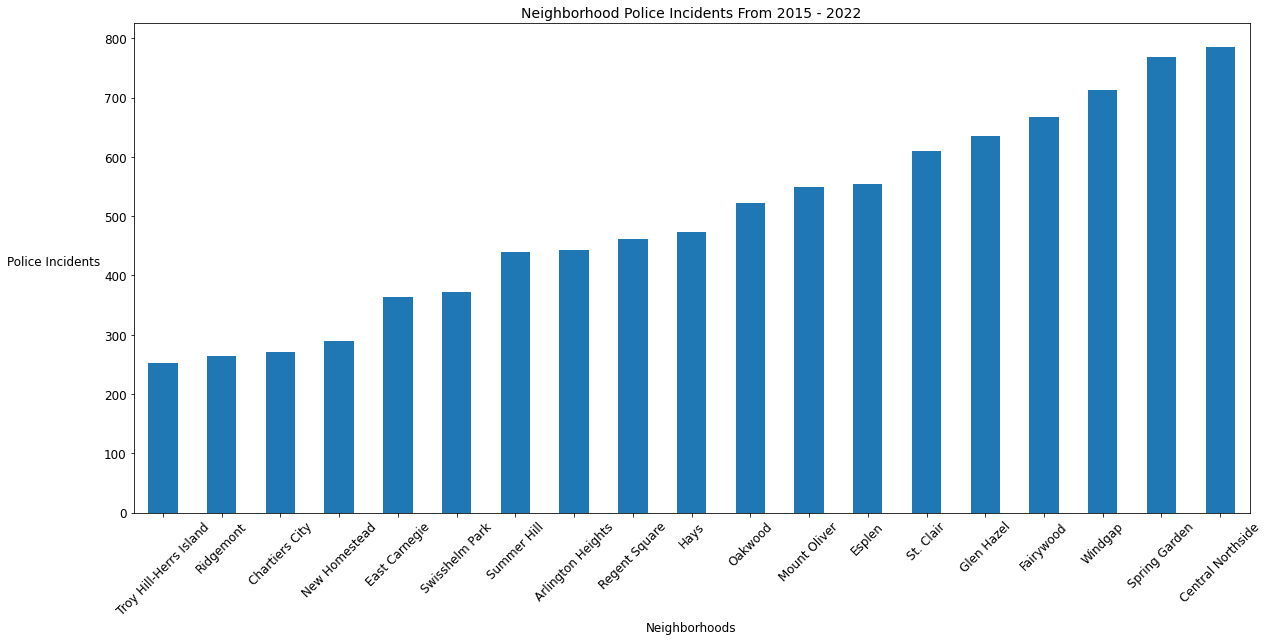

In [288]:
df_reverse10 = df_reverse.iloc[:19] 
plt.rcParams["figure.figsize"] = [20,9]     # setting graph size or else it's too small
df_reverse10.plot.bar()                     # graphing our dataframe
plt.title("Neighborhood Police Incidents From 2015 - 2022", fontsize = 14)   # graph title
plt.xticks(fontsize = 12,rotation=45)       # rorate x-axis for readability
plt.xlabel("Neighborhoods", fontsize = 12)  # set x-axis label

plt.yticks(fontsize = 12)                   # rotate x-axis for readability
plt.ylabel("Police Incidents", fontsize = 12, rotation = 0, labelpad = 50)  # y-axis label, padding because it enters the graph body
plt.show()      

##### Overall Conclusion
In order to combine the two submetrics, we had to find a common neighborhood between the two data sets. In the end, we ended with Central Northside. Central Northside was ranked 19th out of all neighborhoods in regards to police incidents and was ranked 18th in terms of having ISP providers. Our overall metric is living quality, and Central Northside was the "best" in our data driven determination. There might be some biase-ness however with our choice however. The reason Central Northside might rank relatively high in both submetrics might be because of its small area. If it has a small enough area and large enough population density, it can have a large amount of internet providers and also have a lot amount of police incidents

# CHANGE THIS